In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [15]:
#read dataset
df = pd.read_csv('updated_spotify_playlist.csv')
df.head()

,Unnamed: 0,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,...,125,B,Major,80,89,83,31,0,8,4
1,1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,...,92,C#,Major,71,61,74,7,0,10,4
2,2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,...,138,F,Major,51,32,53,17,0,31,6
3,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,...,170,A,Major,55,58,72,11,0,11,15
4,4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,...,144,A,Minor,65,23,80,14,63,11,6


In [34]:
# Print the column names in the DataFrame
df.columns

Index(['Unnamed: 0', 'track_name', 'artist(s)_name', 'artist_count',
       'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'decade'],
      dtype='object')

In [22]:
# Aggregate data by artist count (sum playlists for each artist count)
df_grouped = df.groupby('artist_count')['in_spotify_playlists'].sum().reset_index()

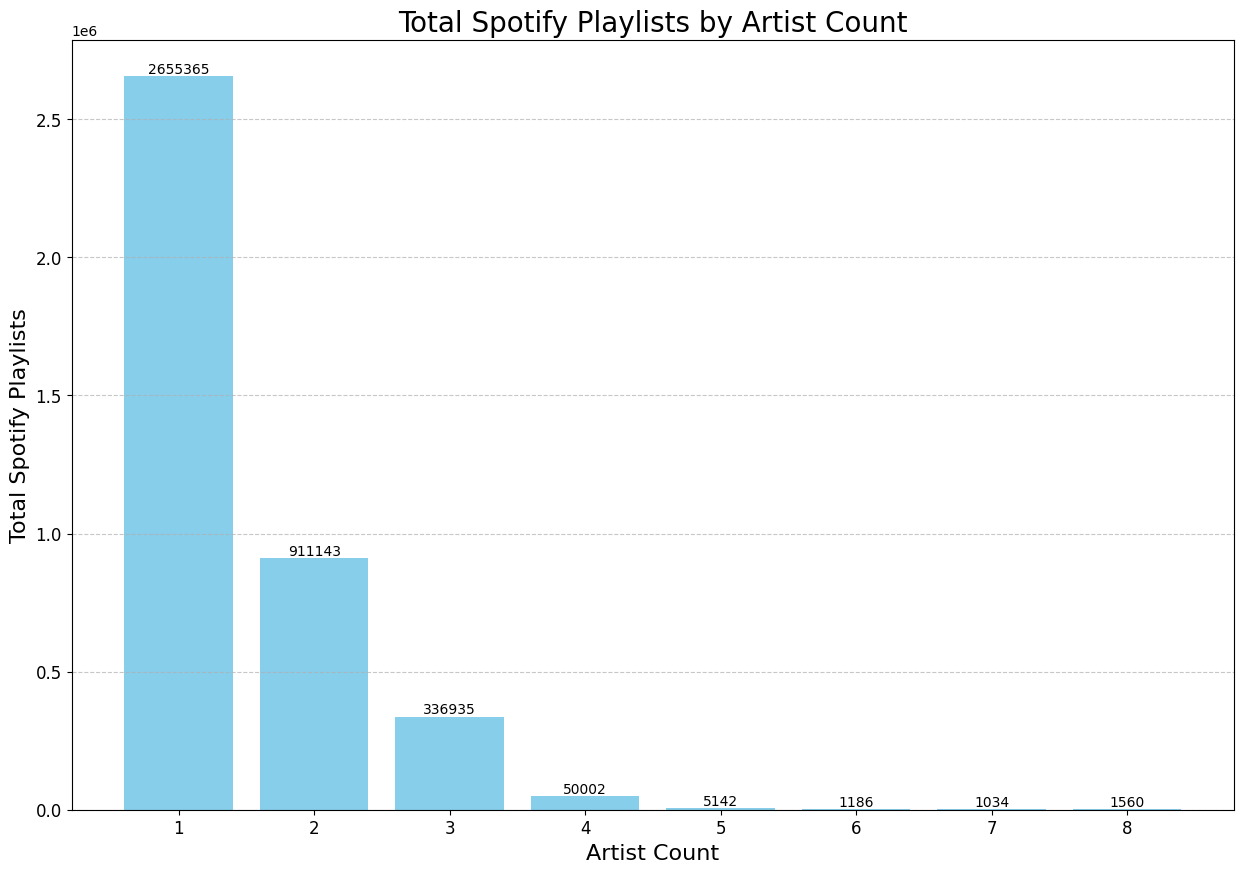

In [23]:
# Plot a bar chart using 'artist_count' and 'in_spotify_playlists'
plt.figure(figsize=(15, 10))  # Increase figure size
bars = plt.bar(df_grouped['artist_count'], df_grouped['in_spotify_playlists'], color='skyblue')  # Create the bar chart

# Add title and labels with increased font size
plt.title('Total Spotify Playlists by Artist Count', fontsize=20)
plt.xlabel('Artist Count', fontsize=16)
plt.ylabel('Total Spotify Playlists', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

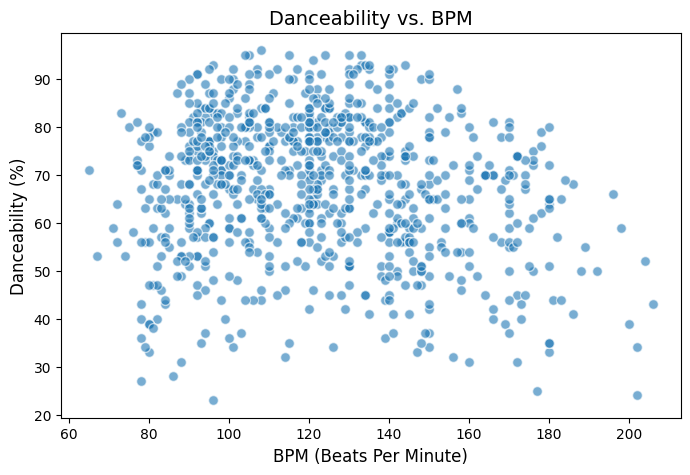

In [25]:
# Plot a scatter plot using 'bpm' and 'danceability_%'
plt.figure(figsize=(8, 5))  # Set the figure size to be smaller
plt.scatter(df['bpm'], df['danceability_%'], alpha=0.6, edgecolors='w', s=50)  # Create the scatter plot with smaller markers

# Add title and labels
plt.title('Danceability vs. BPM', fontsize=14)
plt.xlabel('BPM (Beats Per Minute)', fontsize=12)
plt.ylabel('Danceability (%)', fontsize=12)

# Show the plot
plt.show()

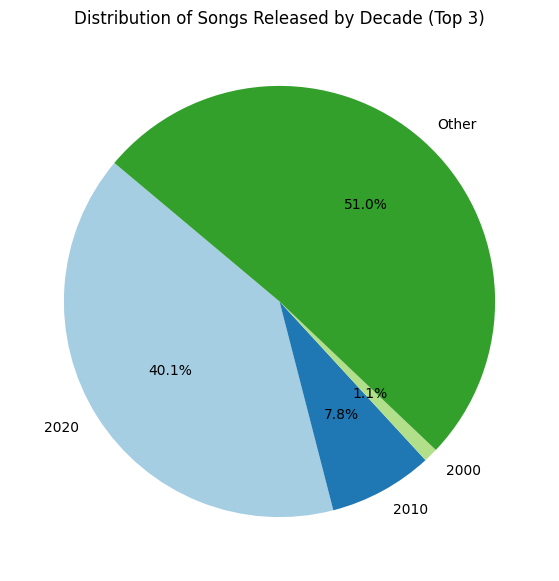

In [30]:
# Create a new column for the decade
df['decade'] = (df['released_year'] // 10) * 10

# Aggregate data by decade (count the number of songs released each decade)
decade_counts = df['decade'].value_counts().sort_index()

# Keep only the top 3 decades, group the rest as "Other"
top_n = 3
top_decades = decade_counts.nlargest(top_n)
other_decades = pd.Series(decade_counts.iloc[top_n:].sum(), index=['Other'])
decade_counts_reduced = pd.concat([top_decades, other_decades])

# Plot a pie chart using 'decade_counts_reduced'
plt.figure(figsize=(10, 7))  # Set the figure size
plt.pie(decade_counts_reduced, labels=decade_counts_reduced.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(decade_counts_reduced))))

# Add title
plt.title('Distribution of Songs Released by Decade (Top 3)')

# Show the plot
plt.show()

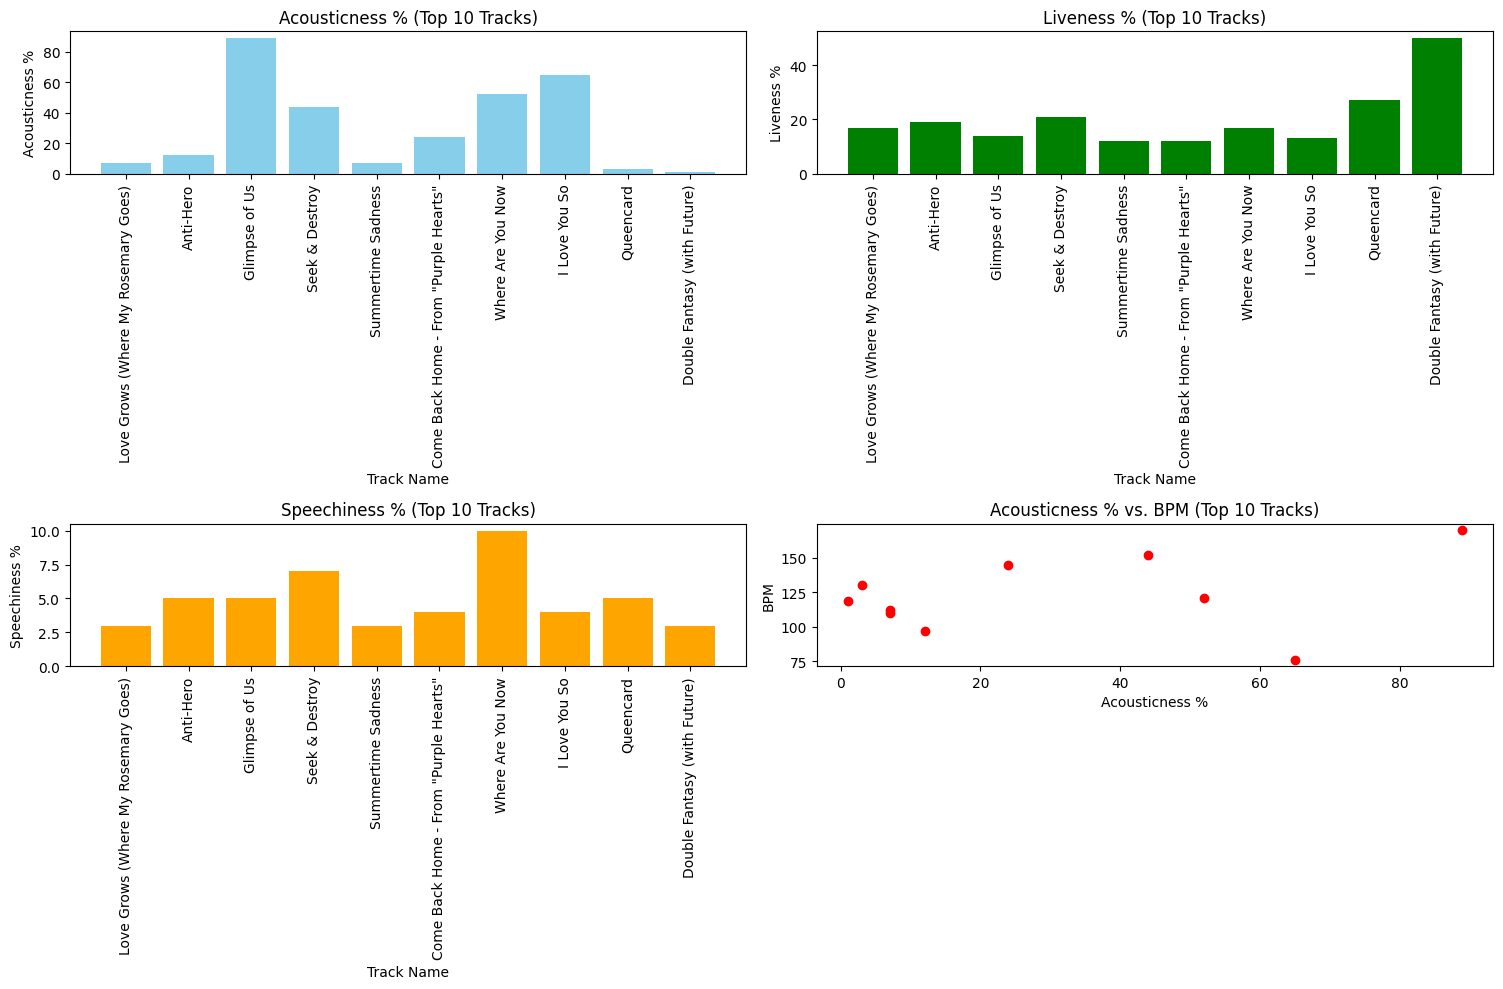

In [33]:
# Sort the dataframe by streams in descending order and select the top 10
df_top10 = df.sort_values(by='streams', ascending=False).head(10)

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Bar chart for acousticness_% for top 10 tracks
axs[0, 0].bar(df_top10['track_name'], df_top10['acousticness_%'], color='skyblue')
axs[0, 0].set_title('Acousticness % (Top 10 Tracks)')
axs[0, 0].set_xlabel('Track Name')
axs[0, 0].set_ylabel('Acousticness %')
axs[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Bar chart for liveness_% for top 10 tracks
axs[0, 1].bar(df_top10['track_name'], df_top10['liveness_%'], color='green')
axs[0, 1].set_title('Liveness % (Top 10 Tracks)')
axs[0, 1].set_xlabel('Track Name')
axs[0, 1].set_ylabel('Liveness %')
axs[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Bar chart for speechiness_% for top 10 tracks
axs[1, 0].bar(df_top10['track_name'], df_top10['speechiness_%'], color='orange')
axs[1, 0].set_title('Speechiness % (Top 10 Tracks)')
axs[1, 0].set_xlabel('Track Name')
axs[1, 0].set_ylabel('Speechiness %')
axs[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Scatter plot for bpm vs. acousticness_% for top 10 tracks
axs[1, 1].scatter(df_top10['acousticness_%'], df_top10['bpm'], color='red')
axs[1, 1].set_title('Acousticness % vs. BPM (Top 10 Tracks)')
axs[1, 1].set_xlabel('Acousticness %')
axs[1, 1].set_ylabel('BPM')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()